# 신경망 알고리즘

In [94]:
# 데이터 처리
import pandas as pd
import numpy as np
# 시각화
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# 시각화 옵션
from IPython.display import set_matplotlib_formats
# 한글 글꼴 설정
mpl.rc('font',family = 'Malgun Gothic')
# 음수값 설정
mpl.rc('axes',unicode_minus=True)
# 그래프 선명하게 출력
set_matplotlib_formats('retina')

In [4]:
df_review = pd.read_csv('data/jobplanet_labelled_review.csv', encoding='cp949')
print(df_review.shape)
df_review.head()

(60, 5)


,Unnamed: 0,Unnamed: 0.1,companyName,review,structure
0,2,7,(주)케이원정보통신,그냥 무능력 팀장은 일안하고 다 밑에 직원들이 다함 도움이 안됨지시와 이행........,0.0
1,3,8,(주)온고테크,탑다운 프로세스로 진행되었던 같습니다만사이트 배분에 있어 직원들 의견도 청취하고 반...,1.0
2,4,9,이에스이(주),공정 분석 밎 요구사항 정리후 설비업체 및 내부 관련 부서들과 조사사항 논의 및 협...,0.0
3,5,10,(주)산들네트웍스,팀장의 톱다운 방식 + 어느정도 의견 제시는 가능함. 크게 불만 없음그냥 일반 회사...,1.0
4,6,47,(주)커머스웨어,"부서마다 다르고 팀마다 다르나 운영팀은 애자일하게, 프로젝트팀은 말그대로 TF방식으...",1.0


In [5]:
df_review['structure'].value_counts()

1.0    30
0.0    30
Name: structure, dtype: int64

In [9]:
# Encoding (범주형 데이터를 숫자로 변환)
df_review['Target'] = df_review['structure']

In [11]:
X_train = df_review['review']
Y_train = df_review['Target']

In [12]:
X_train

0     그냥 무능력 팀장은 일안하고 다 밑에 직원들이 다함 도움이 안됨지시와 이행........
1     탑다운 프로세스로 진행되었던 같습니다만사이트 배분에 있어 직원들 의견도 청취하고 반...
2     공정 분석 밎 요구사항 정리후 설비업체 및 내부 관련 부서들과 조사사항 논의 및 협...
3     팀장의 톱다운 방식 + 어느정도 의견 제시는 가능함. 크게 불만 없음그냥 일반 회사...
4     부서마다 다르고 팀마다 다르나 운영팀은 애자일하게, 프로젝트팀은 말그대로 TF방식으...
5     라떼와 꼰대 마인드 부터 없어져야 함예전과 지금의 세대가 많이 달라졌음을 위에서 알...
6     물어보는것에 대해 화를내거나 찾아서 알아봐라라는 비중을 좀 줄여야한다고 생각한다. ...
7     들어오는일에 대해 크게 관여치 않으며 회의를 통해 업무를 분배너무 잦은 회의는 오히...
8     직원을 위한 투자를 하지 않으며 소모품으로 생각하는 흔한 경영진팀바이팀으로 내용 공...
9     솔직히 이건 별 의미 없는 질문인듯. 부서고 팀이고 뭐고 인원자체가 적은데 뭘? 게...
10    자유롭게 일하고 주말 작업후 휴식을 제공합니다워라벨 보장체계가 없고 그 때, 그 때...
11    필요한것을 요구하면 그게 꼭 필요하냐고 되묻는다결국 직원들이 마련하는 경우도 생김팀...
12    상사가 업무를 지시하여 해당 업무를 지원하는 엔지니어 부서연봉 동결할 생각하지말고 ...
13    회의때 업무를 나열하고 직급 상관없이 주서브 담당자를 정해 업무 실행자유로운 의견교...
14    그냥 노가다 하고있어요 힘듭니다 뭐든지 눈치보고 힘든 회사에요개선이 몇년동안 안되고...
15    직무 단계별로 업무를 진행................상사의 꼰대? 마인드가 개선되...
16    부서별로 차이가 있긴 한데.. 대체로 임원이 결정하고 팀장이 전달하는 탑다운 방식이...
17    규모가 작아 개인이 맡고있는 업무를 개별적으로 처리, 수행했다.업무에 대한 

In [13]:
Y_train

0     0.0
1     1.0
2     0.0
3     1.0
4     1.0
5     0.0
6     1.0
7     1.0
8     0.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    1.0
20    1.0
21    1.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    1.0
28    1.0
29    1.0
30    0.0
31    0.0
32    0.0
33    1.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    1.0
40    0.0
41    0.0
42    1.0
43    0.0
44    1.0
45    0.0
46    0.0
47    1.0
48    1.0
49    1.0
50    1.0
51    1.0
52    1.0
53    1.0
54    1.0
55    1.0
56    1.0
57    1.0
58    1.0
59    1.0
Name: Target, dtype: float64

# 불용어 및 특수문자 처리

In [14]:
from konlpy.tag import Okt
import re

In [15]:
df_stopword = pd.read_csv('stopword.txt', header=None, names=['불용어'])
stopword_set = set(df_stopword['불용어'].values.tolist())

In [16]:
# 불용어 및 특수 기호 처리함수 구성 
def stopword_function(X):
    clean_train_review = []
    okt = Okt()
    # 모든 X 값에 대해 불용어 및 특수기호 처리 
    for i in X:

        # 문자데이터에 대한 불용어 처리 
        if type(i) == str:
            # 특수 문자 처리 
            review_text = re.sub("[!1(+.),.@@\/n2345']?","",i) 
            # Tokenizing & Stemming 
            word_text = okt.morphs(review_text,stem=True)
            # StopWord 
            word_text = [token for token in word_text if not token in stopword_set]  

            clean_train_review.append(word_text)

        # 숫자데이터가 오는 경우, 공백을 append     
        else:
            clean_train_review.append([])
            
    return clean_train_review

In [17]:
X_train_clean = stopword_function(X_train)

 # Text to Sequence / Padding

In [18]:
# row별 단어 수 파악
X_length = X_train.apply(len)
X_length.describe()

count      60.000000
mean      470.516667
std       252.005010
min       139.000000
25%       209.500000
50%       455.500000
75%       681.500000
max      1231.000000
Name: review, dtype: float64

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
model_token = Tokenizer()
model_token.fit_on_texts(X_train_clean)

In [21]:
# Embedding Layer 구성 작업, Input Unit()
len(model_token.word_index)

2040

In [101]:
X_sequence = model_token.texts_to_sequences(X_train_clean)
max_length = 800
X_input = pad_sequences(X_sequence, maxlen=max_length, padding='post')

In [43]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.layers import Input, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [24]:
# Random Seed
tensorflow.random.set_seed(1000)

In [25]:
Y_train

0     0.0
1     1.0
2     0.0
3     1.0
4     1.0
5     0.0
6     1.0
7     1.0
8     0.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    1.0
20    1.0
21    1.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    1.0
28    1.0
29    1.0
30    0.0
31    0.0
32    0.0
33    1.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    1.0
40    0.0
41    0.0
42    1.0
43    0.0
44    1.0
45    0.0
46    0.0
47    1.0
48    1.0
49    1.0
50    1.0
51    1.0
52    1.0
53    1.0
54    1.0
55    1.0
56    1.0
57    1.0
58    1.0
59    1.0
Name: Target, dtype: float64

In [26]:
# Y 값을 Matrix 형태로 변환
Y_matrix = to_categorical(Y_train.astype(int))
Y_matrix

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

# LSTM

In [27]:
# callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [102]:
model_lstm = Sequential()
model_lstm.add(layers.Embedding(2041, 64, input_length=max_length))
# model_lstm.add(Dropout(0.2))
model_lstm.add(layers.LSTM(32))
# model_lstm.add(Dropout(0.2))
# model_lstm.add(Activation('relu'))
model_lstm.add(layers.Dense(2, activation='sigmoid'))

model_lstm.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['acc'])
model_lstm.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 800, 64)           130624    
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 66        
Total params: 143,106
Trainable params: 143,106
Non-trainable params: 0
_________________________________________________________________


In [87]:
X_input

array([[ 44, 942,   7, ...,   0,   0,   0],
       [265, 218, 129, ...,   0,   0,   0],
       [976, 977, 978, ...,   0,   0,   0],
       ...,
       [315, 710,   2, ...,   0,   0,   0],
       [858,   2, 658, ...,   0,   0,   0],
       [ 62,   2, 421, ...,   0,   0,   0]])

In [88]:
Y_matrix

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [103]:
history = model_lstm.fit(X_input, Y_matrix, epochs=50, 
                         batch_size=8, validation_split=0.2)

Epoch 1/50
6/6 [==============================] - 1s 77ms/step - loss: 0.6896 - acc: 0.6250 - val_loss: 0.7729 - val_acc: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 24ms/step - loss: 0.6768 - acc: 0.6250 - val_loss: 0.8230 - val_acc: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 0s 24ms/step - loss: 0.6794 - acc: 0.6250 - val_loss: 0.8462 - val_acc: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 0s 24ms/step - loss: 0.6730 - acc: 0.6250 - val_loss: 0.8768 - val_acc: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 23ms/step - loss: 0.6695 - acc: 0.6250 - val_loss: 0.8900 - val_acc: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 21ms/step - loss: 0.6677 - acc: 0.6250 - val_loss: 0.9022 - val_acc: 0.0000e+00
Epoch 7/50
6/6 [==============================] - 0s 21ms/step - loss: 0.6677 - acc: 0.6250 - val_loss: 0.9149 - val_acc: 0.0000e+00
Epoch 8/50
6/6 [==============================] - 0s 21ms/step - loss

In [104]:
def metrics_plot(history): 
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc)+1)

    plt.plot(epochs, acc, label='Train_Acc')
    plt.plot(epochs, val_acc, label='Validation Acc')
    plt.title('Accuracy Score')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss Score')
    plt.legend()
    
    return plt.show()

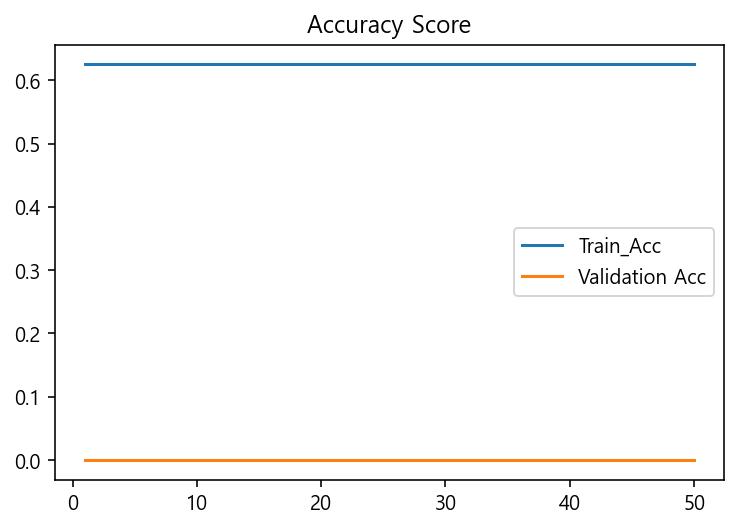

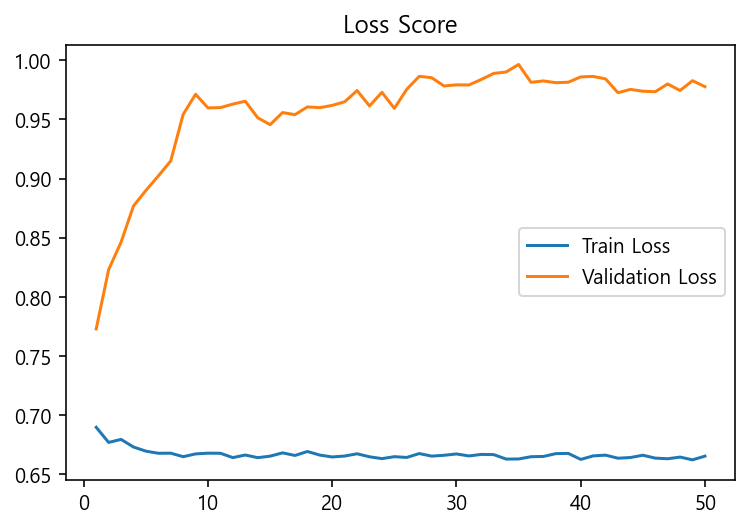

In [105]:
metrics_plot(history)

# 모델로 데이터 라벨링

In [ ]:
# df_raw_review = pd.read_csv()


In [ ]:
# y_ = model_lstm.predict(df_raw_review['review'])
# labelled_review = np.argmax(y_, axis=1)

In [ ]:
# df_raw_review['structure'] = labelled_review